In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/Tanji/Desktop/TSF/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#we have to convert this categorical column of Species to numerical values for calculation, we can do that by using label encoding or by replacing the object values by any numerical no. Here we are going to replace this objects by numericals one such as for setosa we consider 1, for versicolor and virginica we can consider 2 & 3 respectively..and dumped them in a new column named species_type...so here we go

In [9]:
data["Species_type"]=np.where(data.Species=="Iris-setosa",1,np.where(data.Species=="Iris-versicolor",2,3))
data["Species_type"]

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species_type, Length: 150, dtype: int32

In [21]:
data["Species_type"].value_counts()

1    50
2    50
3    50
Name: Species_type, dtype: int64

In [25]:
#Splitting data in X & y
y=data["Species_type"]
print(y)
X=data.drop(["Id","Species","Species_type"],axis=1)
X

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species_type, Length: 150, dtype: int32


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
#Split with Test_train_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [30]:
dt_pred=dt.predict(X_test)

In [31]:
dt_pred.shape

(45,)

In [34]:
print("Train Accuracy of Decision Tree ",dt.score(X_train,y_train)*100)
print("Accuracy (Test) score of Decision Tree",dt.score(X_test,y_test)*100)


Train Accuracy of Decision Tree  100.0
Accuracy (Test) score of Decision Tree 97.77777777777777


In [49]:
##DECISION TREE
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
confusion_matrix(y_test,dt_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

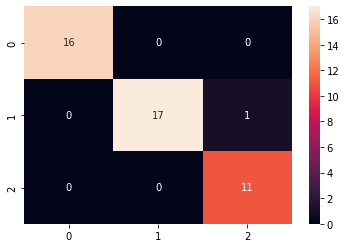

In [50]:
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True, fmt="d")

In [51]:
print('Classification report of desicion tree\n',classification_report(y_test,dt_pred))

Classification report of desicion tree
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# PREDICTION

In [52]:
data=pd.DataFrame({"Actual":y_test,"predicted":dt_pred})
data

,Actual,predicted
114,3,3
62,2,2
33,1,1
107,3,3
7,1,1
100,3,3
40,1,1
86,2,2
76,2,2
71,2,2


In [53]:
data.sample(n=10)

,Actual,predicted
126,3,3
66,2,2
112,3,3
59,2,2
16,1,1
54,2,2
44,1,1
10,1,1
92,2,2
27,1,1


In [61]:
import sklearn.metrics as metrics

metrics.accuracy_score( data.Actual, data.predicted )

0.9777777777777777

# Graphical Representation of Tree

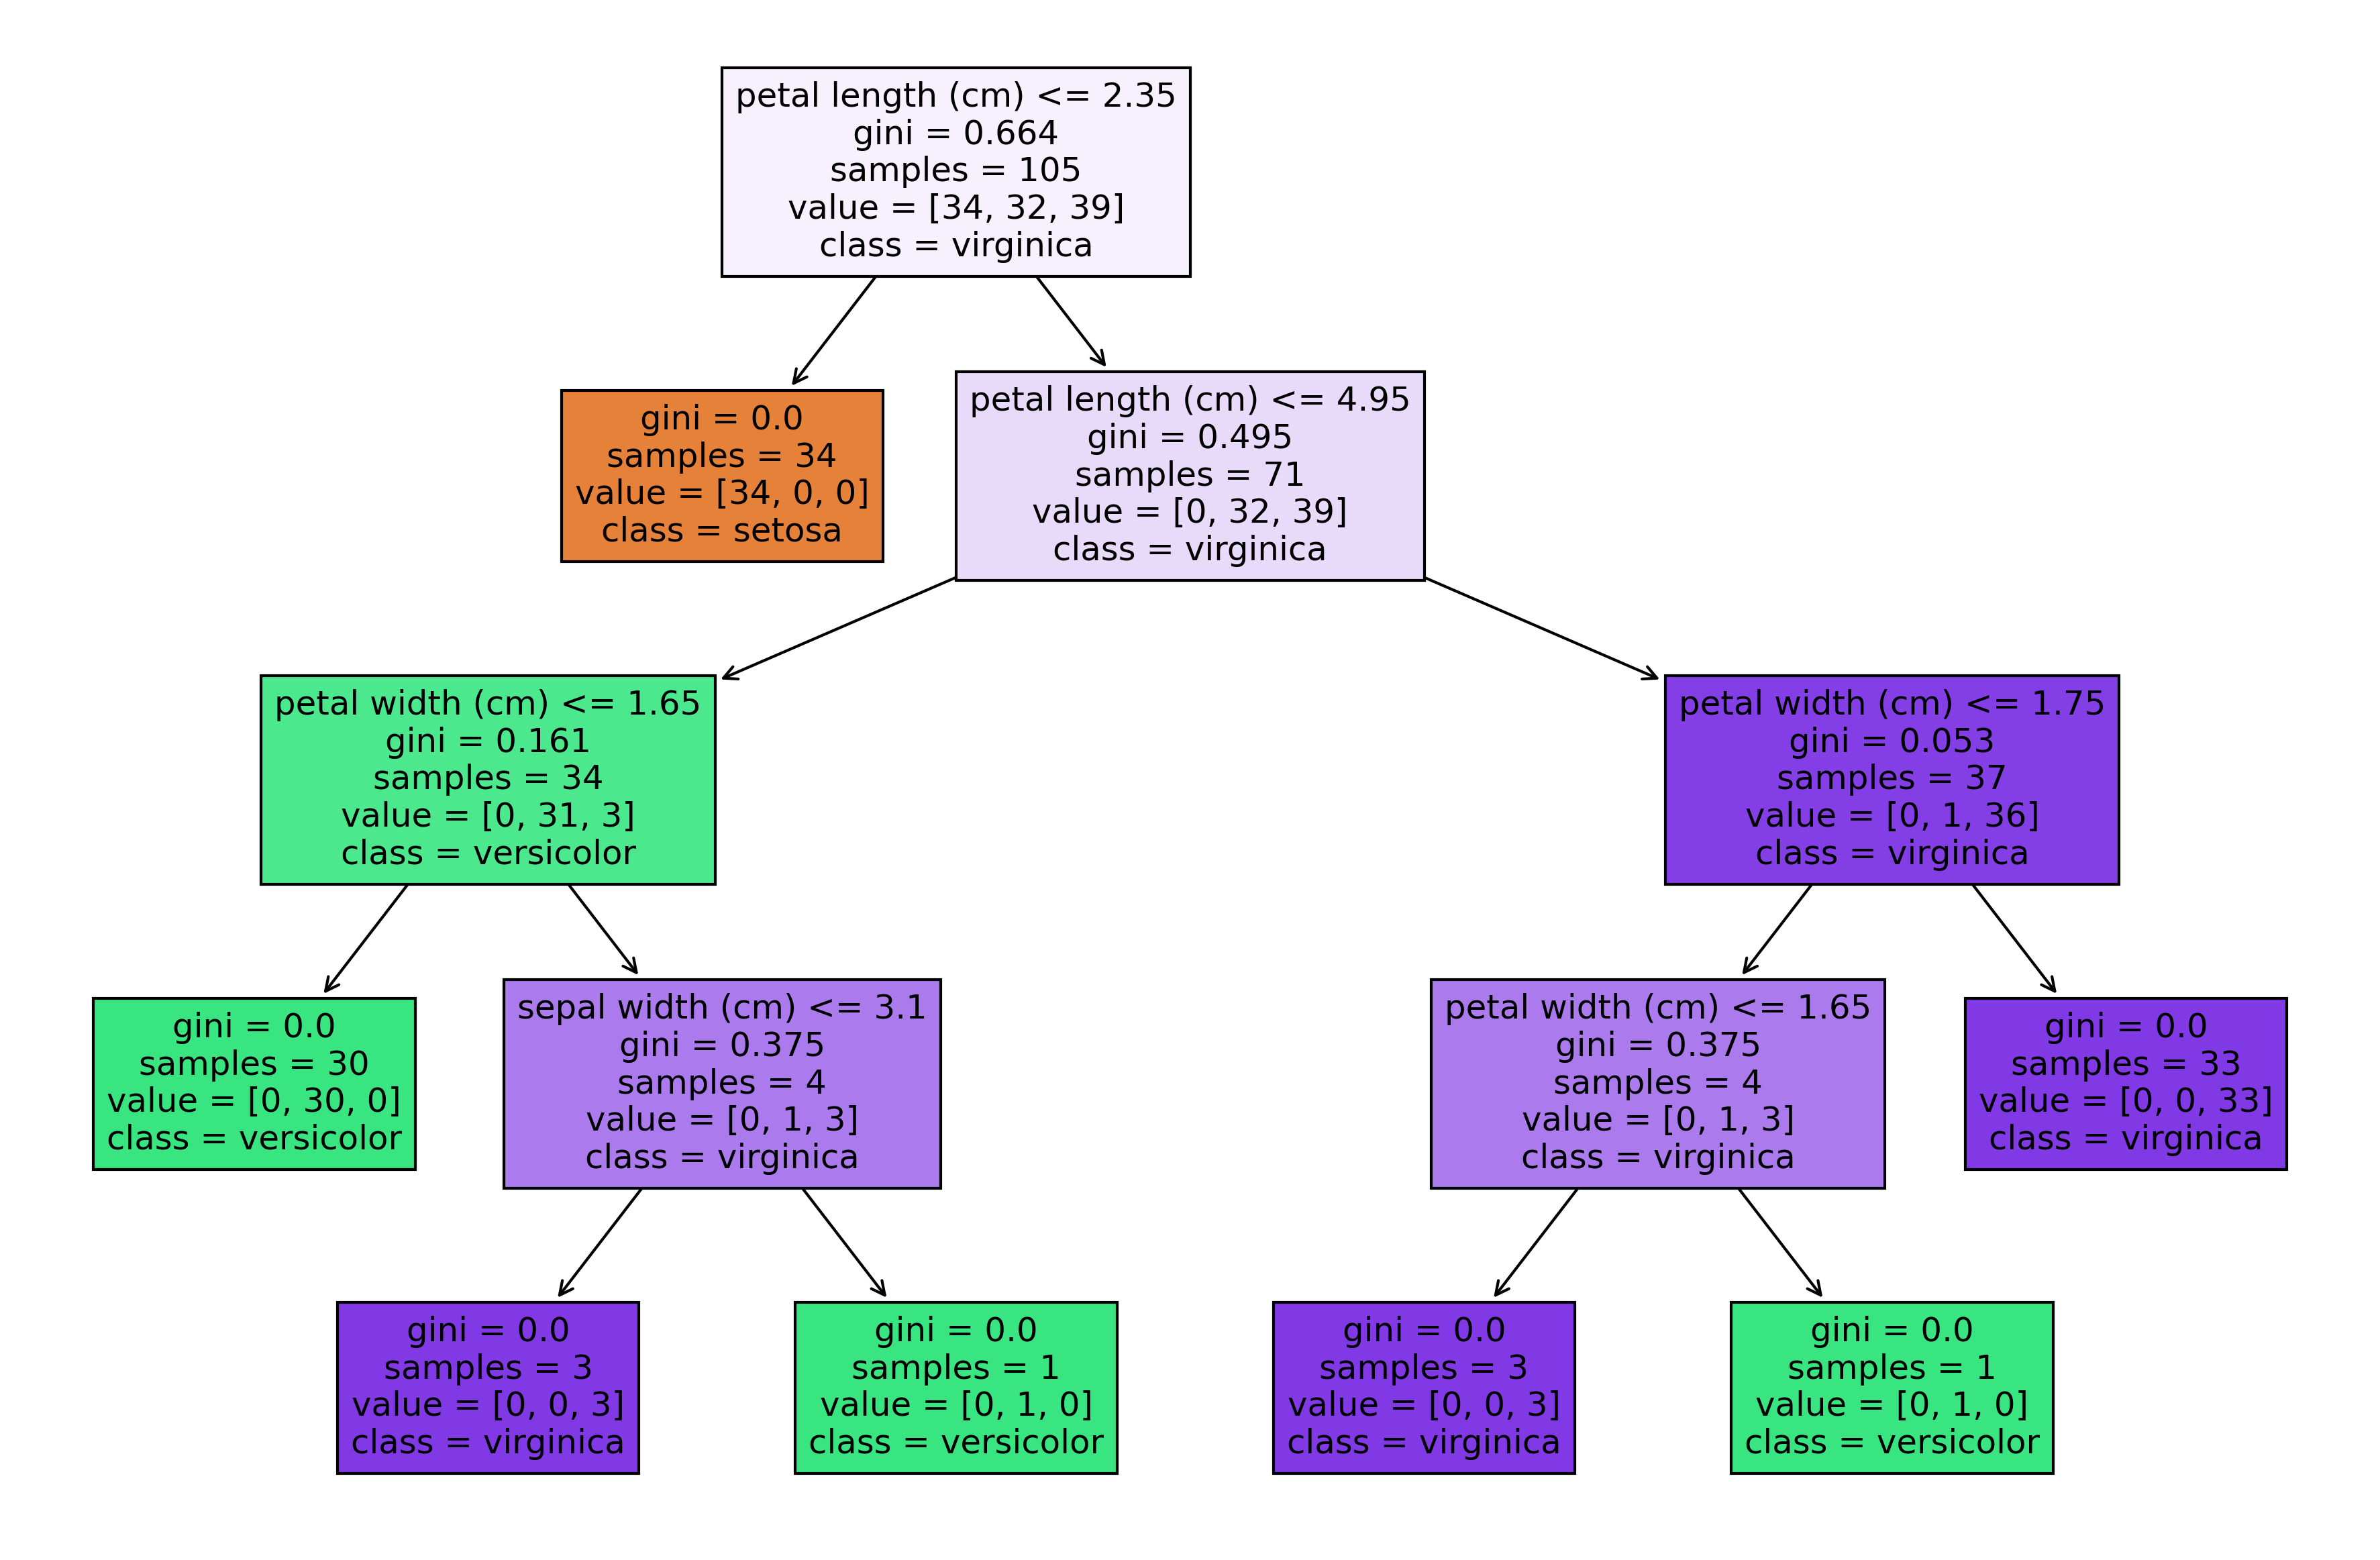

In [63]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')